In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Figure size 640x480 with 0 Axes>

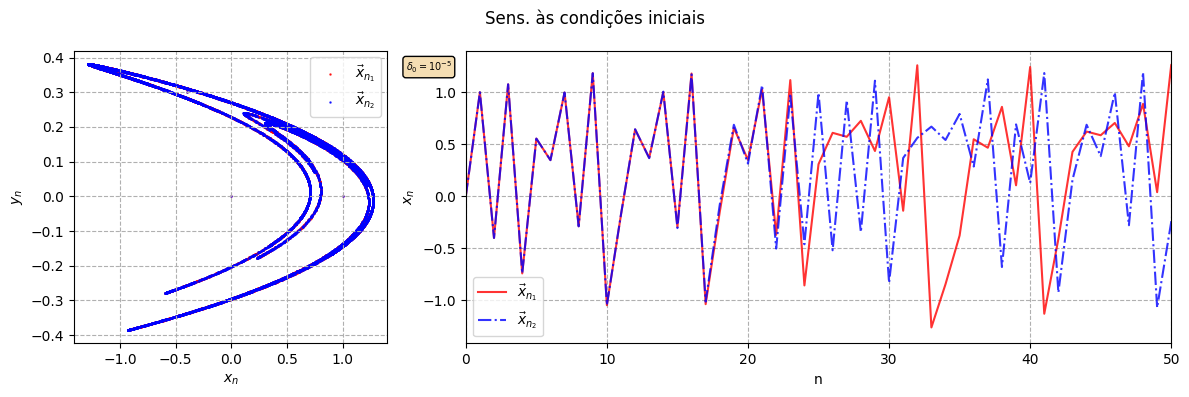

In [19]:
#@title Sensibilidade às cond. iniciais
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**4
t=np.linspace(0,10,Nt)
x1=np.zeros(t.size)
y1=np.zeros(t.size)
x2=np.zeros(t.size)
y2=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x1[0]=cond_init[0]
y1[0]=cond_init[1]
x2[0]=cond_init[0]+10**(-5)
y2[0]=cond_init[1]+10**(-5)
strg=r'$\delta_0 = 10^{-5}$'

for n in range(len(t)-1):
  x1[n+1],y1[n+1]=mapa_heninho(x1[n],y1[n],1.40,0.3)#a_max<1.4014, b_max<0.314
  x2[n+1],y2[n+1]=mapa_heninho(x2[n],y2[n],1.40,0.3)#a_max<1.4014, b_max<0.314

plt.clf()
fig=plt.figure(figsize=(12,4))
ax1=plt.subplot(131)
ax1.scatter(x1,y1, color='r', alpha = 0.8, s=0.6,label=r'$\vec{x}_{n_{1}}$')
ax1.scatter(x2,y2, color='b', alpha = 0.8, s=0.6,label=r'$\vec{x}_{n_{2}}$')
ax1.grid(ls='--')
ax1.set_xlabel(r'$x_n$')
ax1.legend()
ax1.set_ylabel(r'$y_n$')

listapasso=[]
for i in range(len(x1)):
  listapasso.append(i)
ax2=plt.subplot(1,3,(2,3))
ax2.plot(listapasso,x1, '-', color='r', alpha = 0.8, markersize=0.5,label=r'$\vec{x}_{n_{1}}$')
ax2.plot(listapasso,x2, '-.', color='b', alpha = 0.8, markersize=0.5,label=r'$\vec{x}_{n_{2}}$')
ax2.set_xlim(0,50)

props = dict(boxstyle='round', facecolor='wheat')
texto=ax2.text(-0.085,0.97,strg, fontsize='x-small',verticalalignment='top', bbox=props,transform=ax2.transAxes)

ax2.grid(ls='--')
ax2.set_xlabel('n')
ax2.set_ylabel('$x_n$')
ax2.legend()
plt.suptitle('Sens. às condições iniciais')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/sens_cond_init.png',dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

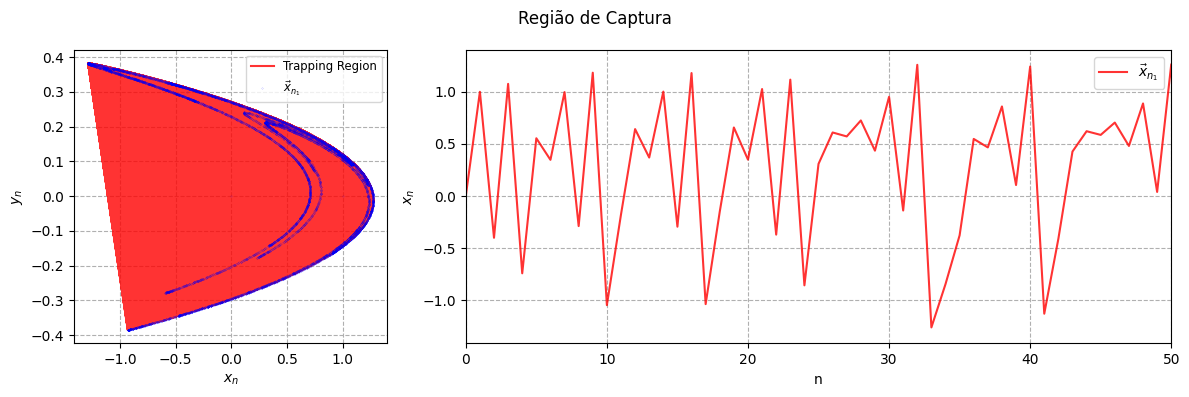

In [11]:
#@title Região de Captura
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**4
t=np.linspace(0,10,Nt)
x1=np.zeros(t.size)
y1=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x1[0]=cond_init[0]
y1[0]=cond_init[1]


for n in range(len(t)-1):
  x1[n+1],y1[n+1]=mapa_heninho(x1[n],y1[n],1.40,0.3)#a_max<1.4014, b_max<0.314


plt.clf()
fig=plt.figure(figsize=(12,4))
ax1=plt.subplot(131)
ax1.plot(x1,y1,'r-',alpha = 0.8, ms=0.2,label=r'Trapping Region')
ax1.plot(x1,y1,'b.',alpha = 0.8, ms=0.2,label=r'$\vec{x}_{n_{1}}$')
ax1.grid(ls='--')
ax1.set_xlabel(r'$x_n$')
ax1.legend(loc='upper right',fontsize='small')
ax1.set_ylabel(r'$y_n$')

listapasso=[]
for i in range(len(x1)):
  listapasso.append(i)
ax2=plt.subplot(1,3,(2,3))
ax2.plot(listapasso,x1, '-', color='r', alpha = 0.8, markersize=0.5,label=r'$\vec{x}_{n_{1}}$')
ax2.set_xlim(0,50)


ax2.grid(ls='--')
ax2.set_xlabel('n')
ax2.set_ylabel('$x_n$')
ax2.legend()
plt.suptitle('Região de Captura')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/trappingregion.png',dpi=300)
plt.show()

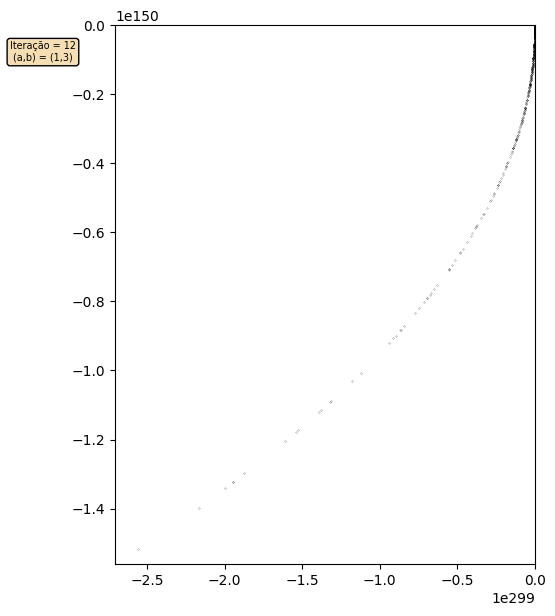

In [9]:
#@title Escape to Infinity
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**5


fig,ax=plt.subplots(figsize=(7,7))
confs,=ax.plot([],[],'k.',lw=0.5,alpha=1,ms=0.3)
props = dict(boxstyle='round', facecolor='wheat')
texto=ax.text(-0.25,0.97,'', fontsize='x-small',verticalalignment='top', bbox=props,transform=ax.transAxes)
plt.subplots_adjust(left=0.3)

x=np.random.uniform(-1,1,Nt)
y=np.random.uniform(-0.1,0.1,Nt)
a,b=1,3

def animate(i):
  x=np.random.uniform(-1,1,Nt)
  y=np.random.uniform(-0.1,0.1,Nt)

  for k in range(i):
    x,y=mapa_heninho(x,y,a,b)

  texto.set_text(f'Iteração = {i+1}\n (a,b) = ({a},{b})')
  xmin=min(x)
  xmax=max(x)
  ymin=min(y)
  ymax=max(y)
  ax.set_xlim(xmin-0.5,xmax+0.5)
  ax.set_ylim(ymin-0.5,ymax+0.5)
  confs.set_data(x,y)
  return confs


ani=FuncAnimation(fig,animate,frames=12,interval=600)
ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/escapetoinfty.gif')
plt.show()

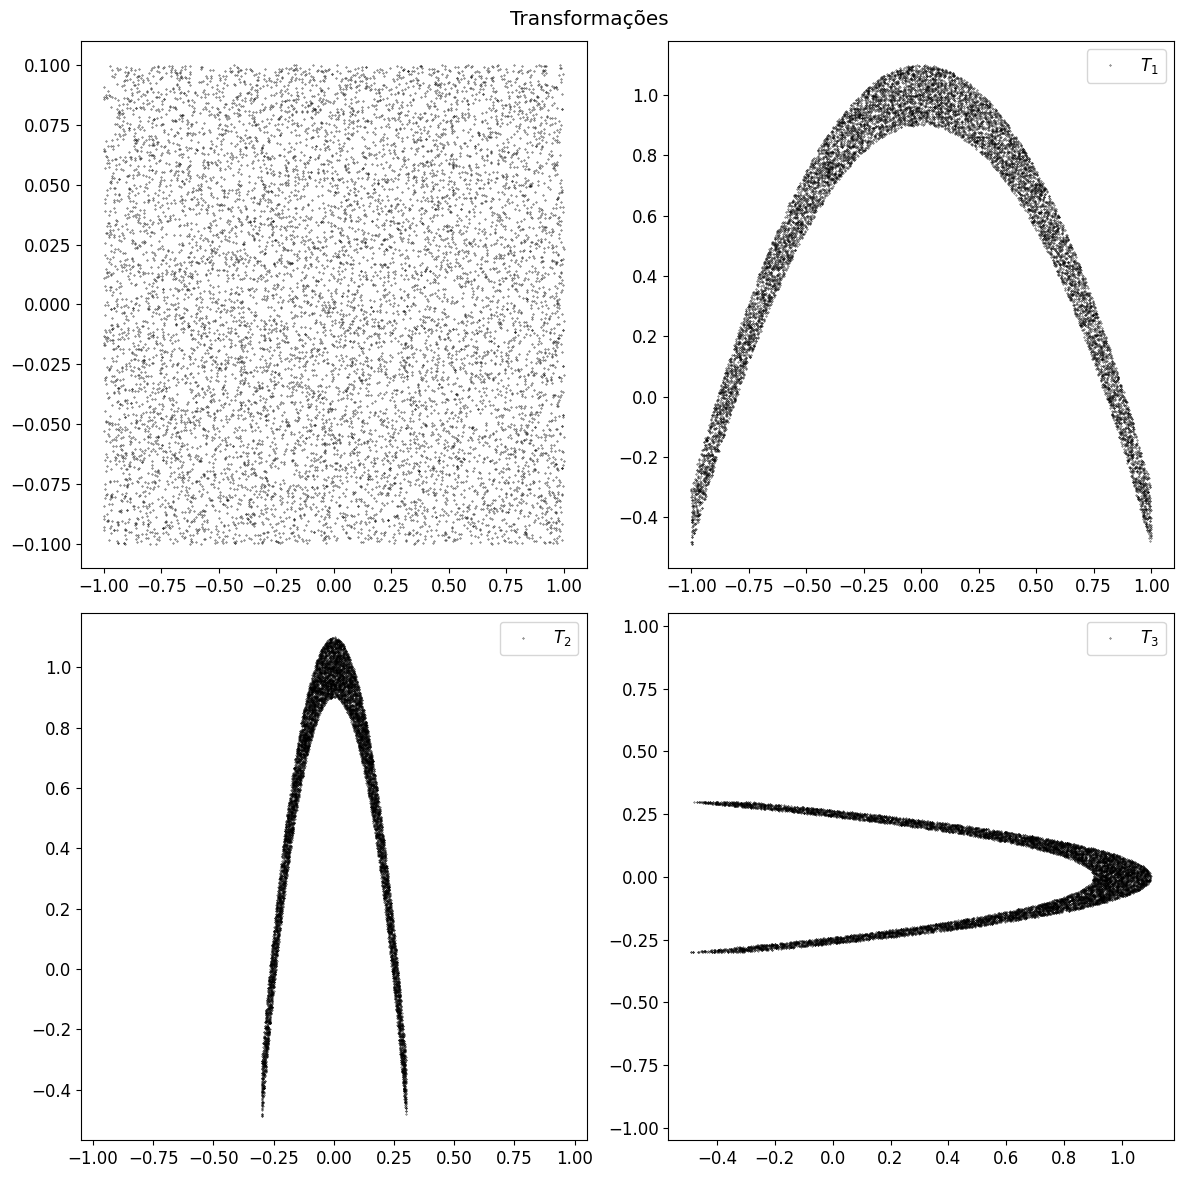

In [33]:
#@title Tranformações
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mapa_heninho(x0,y0,a,b):
  x1=x0
  y1=y0+1-a* x0**2
  x2=b*x1
  y2=y1
  x3=y2
  y3=x2
  return x1,y1,x2,y2,x3,y3




fig,ax=plt.subplots(2,2,figsize=(12,12))
plt.rcParams.update({'font.size': 12})
#props = dict(boxstyle='round', facecolor='wheat')
#texto=ax.text(-0.25,0.97,'', fontsize='x-small',verticalalignment='top', bbox=props,transform=ax.transAxes)
#plt.subplots_adjust(left=0.3)


a,b=1.4,0.3

Nt=10**4
x0=np.random.uniform(-1,1,Nt)
y0=np.random.uniform(-0.1,0.1,Nt)
ax[0,0].plot(x0,y0,'k.',lw=0.5,alpha=1,ms=0.6)

for i in range(Nt):
  x1,y1,x2,y2,x3,y3=mapa_heninho(x0,y0,a,b)

strg=r'$T_{1}$'
ax[0,1].plot(x1,y1,'k.',lw=0.5,alpha=1,ms=0.6,label=strg)
ax[0,1].legend(loc='upper right')
strg=r'$T_{2}$'
ax[1,0].plot(x2,y2,'k.',lw=0.5,alpha=1,ms=0.6,label=strg)
ax[1,0].set_xlim(-1.05,1.05)
ax[1,0].legend(loc='upper right')
strg=r'$T_{3}$'
ax[1,1].plot(x3,y3,'k.',lw=0.5,alpha=1,ms=0.6,label=strg)
ax[1,1].set_ylim(-1.05,1.05)
ax[1,1].legend(loc='upper right')


plt.suptitle('Transformações ')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/transfor.png',dpi=300)
plt.show()


####12.2.13

In [ ]:
#@title Area Preserving
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

#Plot
Nt=10**6
listaa=np.linspace(0,1.4,Nt,endpoint=True)
#listab=np.linspace(0.2,0.3,N,endpoint=True)
listaparam=[listaa,1]


t=np.linspace(0,10**4,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t) #Parâmetros a e b

x[0]=cond_init[0]
y[1]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],listaparam[0][n],listaparam[1])

plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')

molde.plot3D(x,y,listaa,'.', markersize=0.1,label=r'$\vec{X}(t)$')
def animate(i):
  molde.view_init(20,110-i)




ani=FuncAnimation(fig,animate,frames=40,interval=10)
plt.title("Mapão de Heninho")
#molde.set_xlabel('x(t)\n\n')
#molde.set_ylabel('\n\n y(t)')
molde.set_zlabel('\n\n a')

ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/12.2.13.gif')
plt.show()

In [ ]:
#@title Area Preserving
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mapa_heninho(x0,y0,a,b):
  x1=x0
  y1=y0+1-a* x0**2
  x2=b*x1
  y2=y1
  x3=y2
  y3=x2
  return x1,y1,x2,y2,x3,y3




fig,ax=plt.subplots(2,2,figsize=(12,12))

#props = dict(boxstyle='round', facecolor='wheat')
#texto=ax.text(-0.25,0.97,'', fontsize='x-small',verticalalignment='top', bbox=props,transform=ax.transAxes)
#plt.subplots_adjust(left=0.3)


a,b=1.4,0.3

Nt=10**5
x0=np.random.uniform(-1,1,Nt)
y0=np.random.uniform(-0.1,0.1,Nt)
ax[0,0].plot(x0,y0,'k.',lw=0.5,alpha=1,ms=0.6)

for i in range(Nt):
  x1,y1,x2,y2,x3,y3=mapa_heninho(x0,y0,a,b)

ax[0,1].plot(x1,y1,'k.',lw=0.5,alpha=1,ms=0.6)
ax[1,0].plot(x2,y2,'k.',lw=0.5,alpha=1,ms=0.6)
ax[1,0].xlim(-1.05,1.05)
ax[1,1].plot(x3,y3,'k.',lw=0.5,alpha=1,ms=0.6)

plt.show()

####Zoom1

<Figure size 640x480 with 0 Axes>

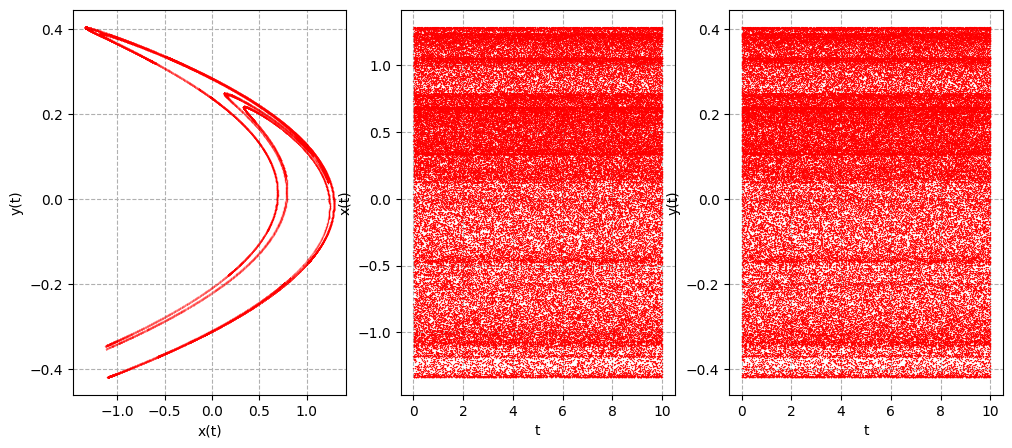

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**5
t=np.linspace(0,10,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x[0]=cond_init[0]
y[0]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],1.4014,0.314)#a_max<1.4014, b_max<0.314

plt.clf()
fig,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x,y, '^', color='red', alpha = 1, markersize=0.01)
ax[0].grid(ls='--')
ax[0].set_xlabel('$x_n$')
ax[0].set_ylabel('$y_n$')

ax[1].plot(t,x, '^', color='red', alpha = 1, markersize=0.2)
ax[1].grid(ls='--')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$x_n$')
ax[2].plot(t,y, '^', color='red', alpha = 1, markersize=0.2)
ax[2].grid(ls='--')
ax[2].set_xlabel('n')
ax[2].set_ylabel('$y_n$')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

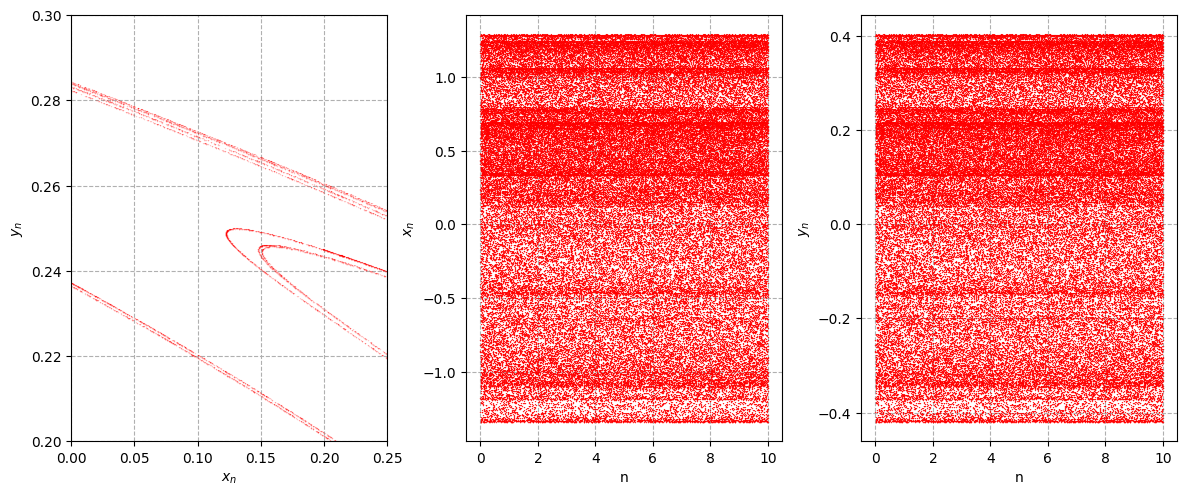

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**5

t=np.linspace(0,10,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x[0]=cond_init[0]
y[0]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],1.4014,0.314)#a_max<1.4014, b_max<0.314

plt.clf()
fig,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x,y, '^', color='red', alpha = 1, markersize=0.05)
ax[0].grid(ls='--')
ax[0].set_xlabel('$x_n$')
ax[0].set_ylabel('$y_n$')

ax[1].plot(t,x, '^', color='red', alpha = 1, markersize=0.2)
ax[1].grid(ls='--')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$x_n$')
ax[2].plot(t,y, '^', color='red', alpha = 1, markersize=0.2)
ax[2].grid(ls='--')
ax[2].set_xlabel('n')
ax[2].set_ylabel('$y_n$')
plt.tight_layout()
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0.2,0.3)
plt.show()

<Figure size 640x480 with 0 Axes>

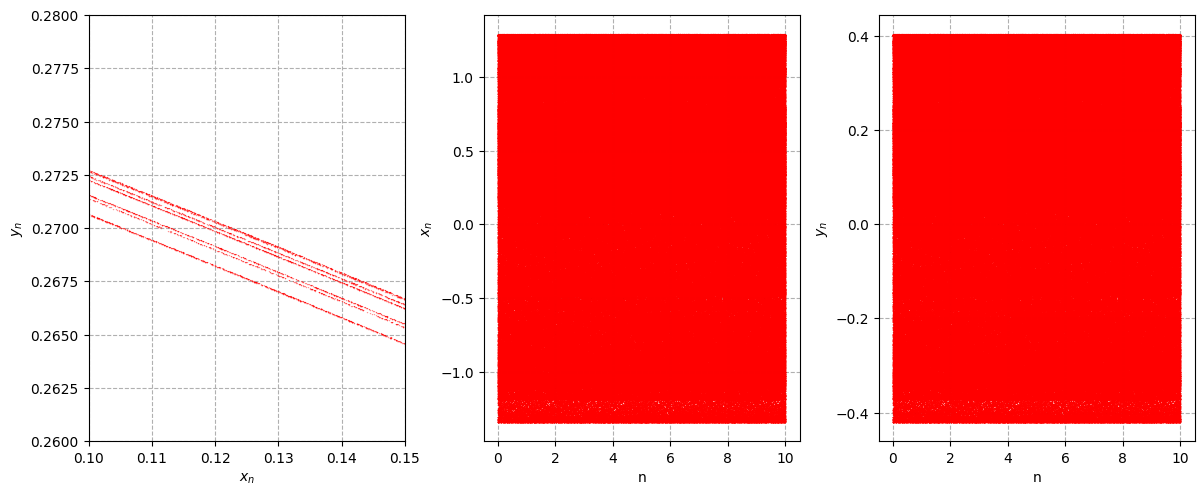

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**6

t=np.linspace(0,10,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x[0]=cond_init[0]
y[0]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],1.4014,0.314)#a_max<1.4014, b_max<0.314

plt.clf()
fig,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x,y, '^', color='red', alpha = 1, markersize=0.1)
ax[0].grid(ls='--')
ax[0].set_xlabel('$x_n$')
ax[0].set_ylabel('$y_n$')

ax[1].plot(t,x, '^', color='red', alpha = 1, markersize=0.2)
ax[1].grid(ls='--')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$x_n$')
ax[2].plot(t,y, '^', color='red', alpha = 1, markersize=0.2)
ax[2].grid(ls='--')
ax[2].set_xlabel('n')
ax[2].set_ylabel('$y_n$')
plt.tight_layout()
ax[0].set_xlim(0.1,0.15)
ax[0].set_ylim(0.26,0.28)
plt.show()

###Zoom2

<Figure size 1200x800 with 0 Axes>

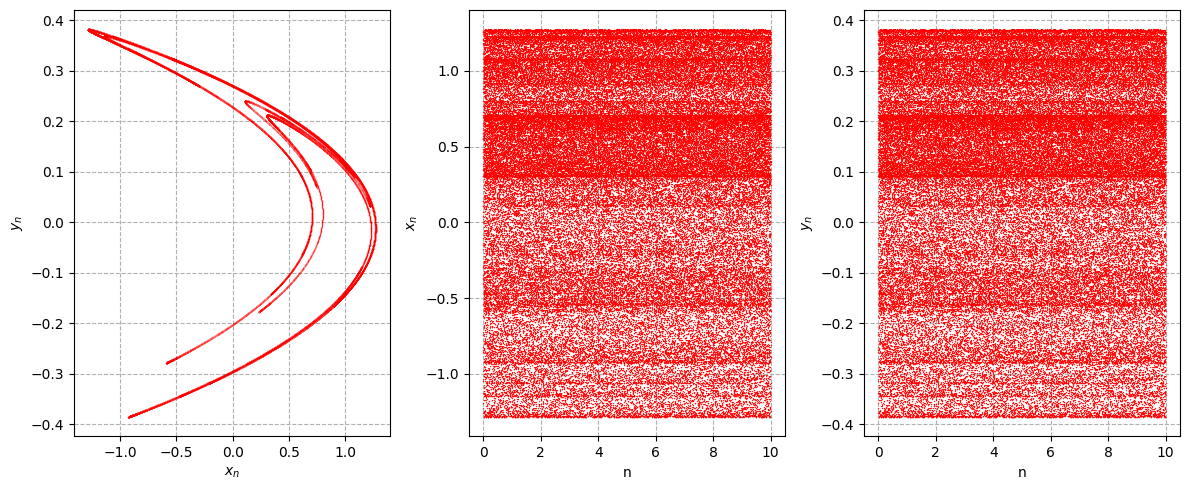

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**(5)
t=np.linspace(0,10,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x[0]=cond_init[0]
y[1]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],1.40,0.3)#a_amax<1.4014, b_max<0.314

plt.clf()
fig,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x,y, '^', color='red', alpha = 1, markersize=0.01)
ax[0].grid(ls='--')
ax[0].set_xlabel('$x_n$')
ax[0].set_ylabel('$y_n$')

ax[1].plot(t,x, '^', color='red', alpha = 1, markersize=0.2)
ax[1].grid(ls='--')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$x_n$')
ax[2].plot(t,y, '^', color='red', alpha = 1, markersize=0.2)
ax[2].grid(ls='--')
ax[2].set_xlabel('n')
ax[2].set_ylabel('$y_n$')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

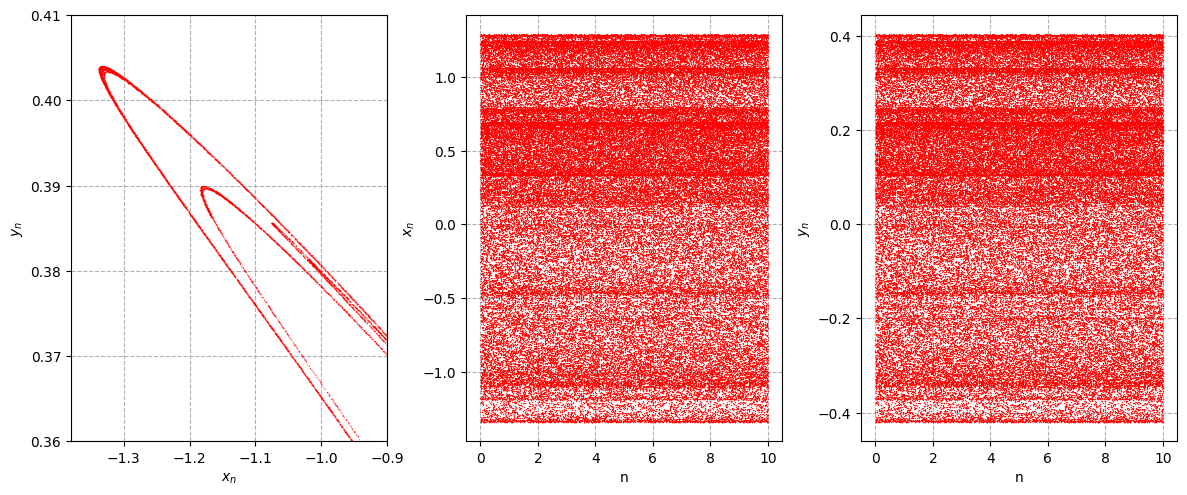

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**5

t=np.linspace(0,10,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x[0]=cond_init[0]
y[0]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],1.4014,0.314)#a_max<1.4014, b_max<0.314

plt.clf()
fig,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x,y, '^', color='red', alpha = 1, markersize=0.1)
ax[0].grid(ls='--')
ax[0].set_xlabel('$x_n$')
ax[0].set_ylabel('$y_n$')

ax[1].plot(t,x, '^', color='red', alpha = 1, markersize=0.2)
ax[1].grid(ls='--')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$x_n$')
ax[2].plot(t,y, '^', color='red', alpha = 1, markersize=0.2)
ax[2].grid(ls='--')
ax[2].set_xlabel('n')
ax[2].set_ylabel('$y_n$')
plt.tight_layout()
ax[0].set_xlim(-1.38,-0.9)
ax[0].set_ylim(0.36,0.41)
plt.show()

<Figure size 640x480 with 0 Axes>

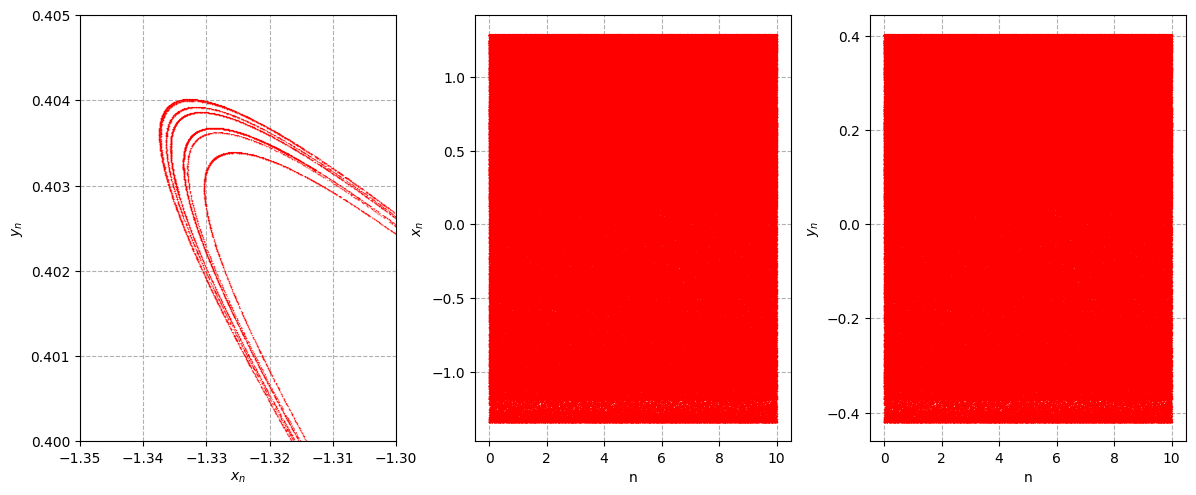

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**6

t=np.linspace(0,10,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x[0]=cond_init[0]
y[0]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],1.4014,0.314)#a_max<1.4014, b_max<0.314

plt.clf()
fig,ax=plt.subplots(1,3,figsize=(12,5))
ax[0].plot(x,y, '^', color='red', alpha = 1, markersize=0.1)
ax[0].grid(ls='--')
ax[0].set_xlabel('$x_n$')
ax[0].set_ylabel('$y_n$')

ax[1].plot(t,x, '^', color='red', alpha = 1, markersize=0.2)
ax[1].grid(ls='--')
ax[1].set_xlabel('n')
ax[1].set_ylabel('$x_n$')
ax[2].plot(t,y, '^', color='red', alpha = 1, markersize=0.2)
ax[2].grid(ls='--')
ax[2].set_xlabel('n')
ax[2].set_ylabel('$y_n$')
plt.tight_layout()
ax[0].set_xlim(-1.35,-1.3)
ax[0].set_ylim(0.40,0.405)
plt.show()

###CUIDADO

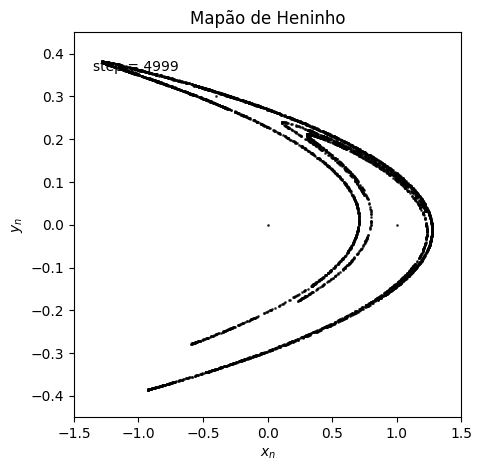

In [ ]:
#@title CUIDADO AO RODAR
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

#Plot
xxx='''N=20
listaa=np.linspace(1.2,1.4,N,endpoint=True)
listab=np.linspace(0.2,0.3,N,endpoint=True)
listaparam=[listaa,listab]'''

#for k in range(N):
Nt=10**(4)
t=np.arange(0,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t) #Parâmetros a e b

x[0]=cond_init[0]
y[1]=cond_init[1]

for i in range(len(t)-1):
  x[i+1],y[i+1]=mapa_heninho(x[i],y[i],1.4,0.3)



fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(xlim=(-1.5,1.5), ylim=(-0.45, 0.45))
confs, = ax.plot([],[], 'ko', ms=1, alpha=0.7)
texto = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def animate(i):
  confs.set_data(x[:i],y[:i])
  texto.set_text(f'step = {i}')
  return confs, texto



ani=FuncAnimation(fig,animate,frames=Nt//2,interval=20)
plt.title("Mapão de Heninho")
plt.xlabel(r"$x_n$")
plt.ylabel(r'$y_n$')

ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/Mapão de Heninho.gif')
plt.show()


#ax.plot(x,y, '^', color='red', alpha = 1, markersize=0.2)
#ax.grid(ls='--')




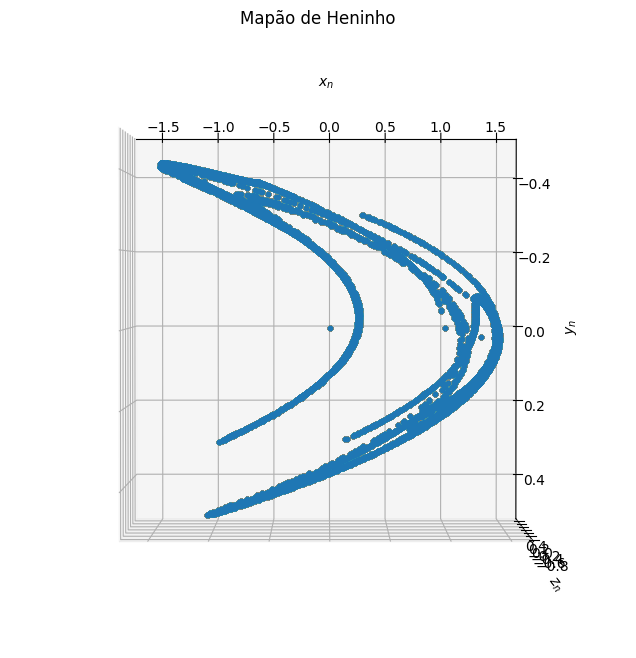

In [ ]:
#@title Basico 3D - Hitz e Zele
def mapa_heninho(x0,y0,z0,a,b):
  x=-a* x0**2+z0+1
  y=-b*x0
  z=b*x0+y0
  return x,y,z

Nt=10000
t=np.linspace(0,10**3,Nt)
x,y,z=np.zeros(t.size),np.zeros(t.size),np.zeros(t.size)
#y=np.zeros(t.size)
#z=np.zeros(t.size)
cond_init = [0,0,0] #Condições Iniciais de x(t) e y(t)


x[0],y[0],z[0]=cond_init[0],cond_init[1],cond_init[2]

for n in range(len(t)-1):
  x[n+1],y[n+1],z[n+1]=mapa_heninho(x[n],y[n],z[n],1.07,0.3)#a_max<1.4014, b_max<0.314


plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')

#confs, = molde.plot3D(x,y,z, 'k.', ms=1, alpha=0.7)
#texto = molde.text(0.05, 0.9)


def animate(i):
  molde.plot3D(x,y,z,'.',label=r'$\vec{X}(t)$')
  if i<20:
    molde.view_init(i,-40)
  elif i>=20 and i<30:
    molde.view_init(40-i,-40)
  elif i>=30 and i<80:
    molde.view_init(10,-i-10)
  elif i>=80:
    molde.view_init(90-i,-90)



ani=FuncAnimation(fig,animate,frames=180,interval=30)
plt.title("Mapão de Heninho")
molde.set_xlabel('$x_n$\n\n')
molde.set_ylabel('\n\n $y_n$')
molde.set_zlabel('\n\n $z_n$')

ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/mapa_3D_final.gif')
plt.show()

In [ ]:
#@title Basico 3D - Hitz e Zele
def mapa_heninho(x0,y0,z0,a,b):
  x=-a* x0**2+z0+1
  y=-b*x0
  z=b*x0+y0
  return x,y,z

Nt=10000
t=np.linspace(0,10**3,Nt)
x,y,z=np.zeros(t.size),np.zeros(t.size),np.zeros(t.size)
#y=np.zeros(t.size)
#z=np.zeros(t.size)
cond_init = [0,0,0] #Condições Iniciais de x(t) e y(t)


x[0],y[0],z[0]=cond_init[0],cond_init[1],cond_init[2]

for n in range(len(t)-1):
  x[n+1],y[n+1],z[n+1]=mapa_heninho(x[n],y[n],z[n],1.07,0.3)#a_max<1.4014, b_max<0.314


plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')

#confs, = molde.plot3D(x,y,z, 'k.', ms=1, alpha=0.7)
#texto = molde.text(0.05, 0.9)

molde.plot3D(x,y,z,'.',label=r'$\vec{X}(t)$')
molde.view_init(-90,-90)
#ani=FuncAnimation(fig,animate,frames=120,interval=3)
plt.title("Mapão de Heninho")
molde.set_xlabel('x(t)\n\n')
molde.set_ylabel('\n\n y(t)')
molde.set_zlabel('\n\n z(t)')

#ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/mapa_3D.gif')
plt.show()

###Variando os parâmetros

Text(0.5, 0.92, 'Mapão de Heninho')

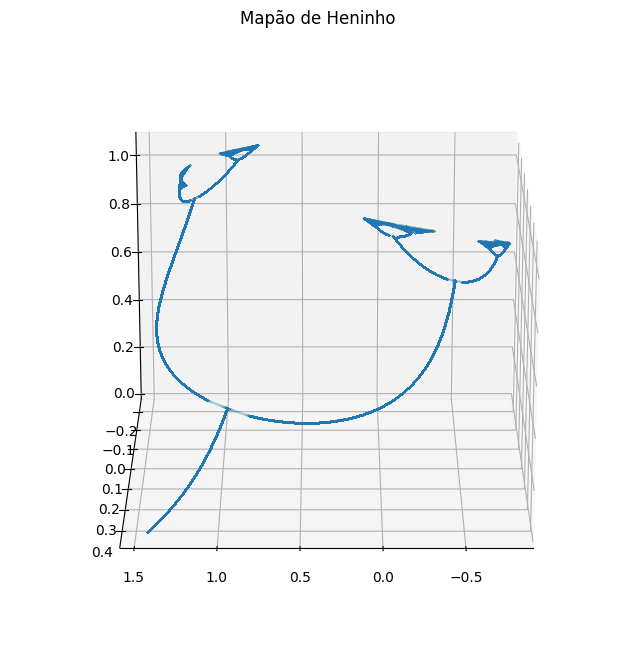

In [ ]:
#@title 12.2.8: a variando s/ gif
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

#Plot
Nt=10**7
listaa=np.linspace(0,1.07,Nt,endpoint=True)
#listab=np.linspace(0.2,0.3,N,endpoint=True)
listaparam=[listaa,0.3]


t=np.linspace(0,10**5,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t) #Parâmetros a e b

x[0]=cond_init[0]
y[1]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],listaparam[0][n],listaparam[1])

plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')
molde.plot3D(x,y,listaa,'.',ms=0.009,label=r'$\vec{X}(t)$')
molde.view_init(20,90)



#ani=FuncAnimation(fig,animate,frames=180,interval=30)
plt.title("Mapão de Heninho")

Text(0.5, 0.92, 'Mapão de Heninho')

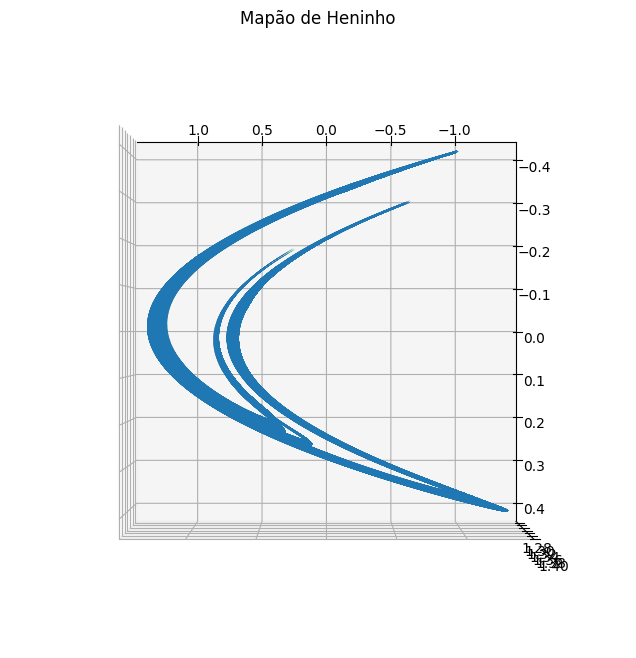

In [ ]:
#@title 12.2.8: a variando s/ gif
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

#Plot
Nt=10**7
listaa=np.linspace(1.27,1.4,Nt,endpoint=True)
#listab=np.linspace(0.2,0.3,N,endpoint=True)
listaparam=[listaa,0.3]


t=np.linspace(0,10**5,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t) #Parâmetros a e b

x[0]=cond_init[0]
y[1]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],listaparam[0][n],listaparam[1])

plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')
molde.plot3D(x,y,listaa,'.',ms=0.009,label=r'$\vec{X}(t)$')
molde.view_init(90,90)



#ani=FuncAnimation(fig,animate,frames=180,interval=30)
plt.title("Mapão de Heninho")

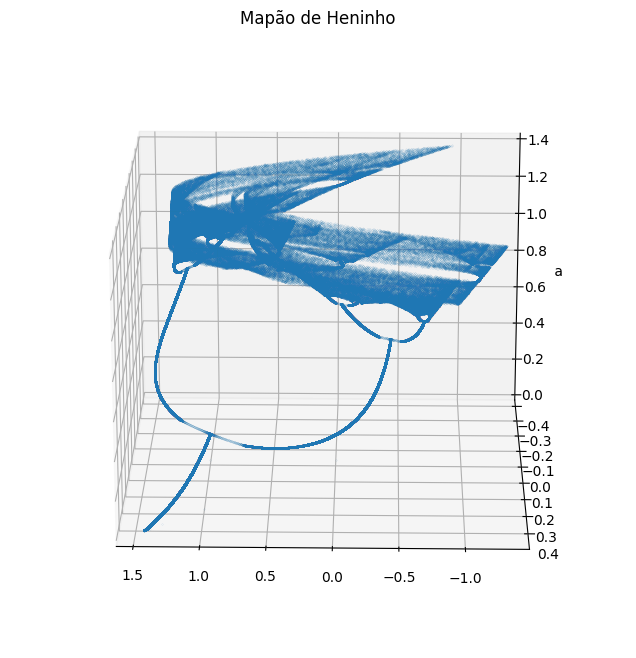

In [ ]:
#@title a variando
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

#Plot
Nt=10**6
listaa=np.linspace(0,1.4,Nt,endpoint=True)
#listab=np.linspace(0.2,0.3,N,endpoint=True)
listaparam=[listaa,0.3]


t=np.linspace(0,10**4,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t) #Parâmetros a e b

x[0]=cond_init[0]
y[1]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],listaparam[0][n],listaparam[1])

plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')

molde.plot3D(x,y,listaa,'.', markersize=0.1,label=r'$\vec{X}(t)$')
def animate(i):
  molde.view_init(20,110-i)




ani=FuncAnimation(fig,animate,frames=40,interval=10)
plt.title("Mapão de Heninho")
#molde.set_xlabel('x(t)\n\n')
#molde.set_ylabel('\n\n y(t)')
molde.set_zlabel('\n\n a')

ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/diagrama de bifurc em a.gif')
plt.show()

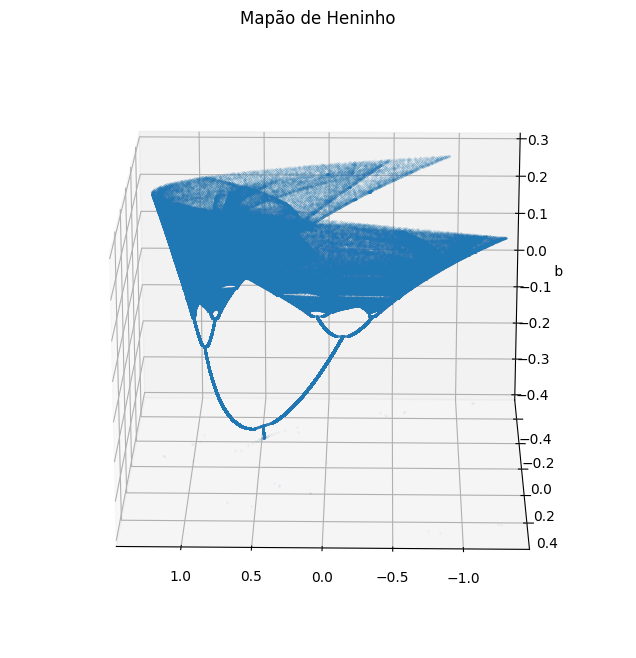

In [ ]:
#@title b variando
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

#Plot
Nt=10**6
listab=np.linspace(-0.40,0.3,Nt,endpoint=True)
listaparam=[1.4,listab]


t=np.linspace(0,10**2,Nt)
x=np.zeros(t.size)
y=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t) #Parâmetros a e b

x[0]=cond_init[0]
y[1]=cond_init[1]

for n in range(len(t)-1):
  x[n+1],y[n+1]=mapa_heninho(x[n],y[n],listaparam[0],listaparam[1][n])

plt.rcParams["figure.figsize"] = [12,8]
plt.rcParams.update({'font.size': 10})
#plt.rcParams.update({'figure.autolayout': True})
colors = ['forestgreen','darkorange','dodgerblue','deeppink']
fig=plt.figure()
molde = plt.axes(projection='3d')

molde.plot3D(x,y,listab,'.', markersize=0.1,label=r'$\vec{X}(t)$')
def animate(i):
  molde.view_init(20,140-i)




ani=FuncAnimation(fig,animate,frames=50,interval=10)
plt.title("Mapão de Heninho")
#molde.set_xlabel('x(t)\n\n')
#molde.set_ylabel('\n\n y(t)')
molde.set_zlabel('\n\n b')

ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/diagrama de bifurc em b.gif')
plt.show()

####Rascunho

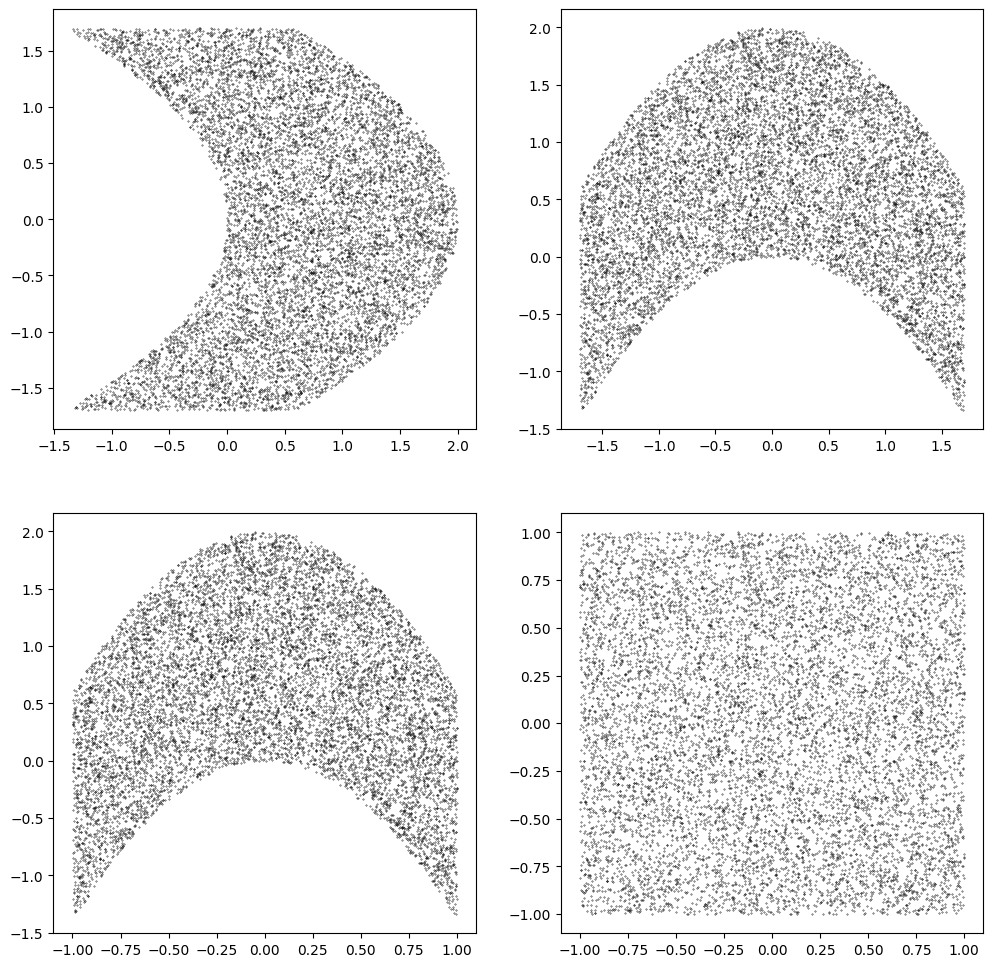

In [ ]:
#@title Basico
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mapa1_heninho(x0,y0,a,b):
  x1=x0
  y1=y0+1-a* x0**2
  x2=b*x1
  y2=y1
  x3=y2
  y3=x2
  return x1,y1,x2,y2,x3,y3




fig,ax=plt.subplots(2,2,figsize=(12,12))

#props = dict(boxstyle='round', facecolor='wheat')
#texto=ax.text(-0.25,0.97,'', fontsize='x-small',verticalalignment='top', bbox=props,transform=ax.transAxes)
#plt.subplots_adjust(left=0.3)


a,b=1.4,1.7

Nt=10**4
x0=np.random.uniform(-1,1,Nt)
y0=np.random.uniform(-1,1,Nt)


for i in range(Nt):
  x1,y1,x2,y2,x3,y3=mapa1_heninho(x0,y0,a,b)

ax[0,0].plot(x3,y3,'k.',lw=0.5,alpha=1,ms=0.6)

def mapa2_heninho(x3,y3,a,b):
  y2=x3
  x2=y3
  x1=x2/b
  y1=y2
  x0=x1
  y0=y1-1+a* x1**2
  return x1,y1,x2,y2,x0,y0



#props = dict(boxstyle='round', facecolor='wheat')
#texto=ax.text(-0.25,0.97,'', fontsize='x-small',verticalalignment='top', bbox=props,transform=ax.transAxes)
#plt.subplots_adjust(left=0.3)




for i in range(Nt):
  x1,y1,x2,y2,x0,y0=mapa2_heninho(x3,y3,a,b)

ax[0,1].plot(x2,y2,'k.',lw=0.5,alpha=1,ms=0.6)
ax[1,0].plot(x1,y1,'k.',lw=0.5,alpha=1,ms=0.6)
ax[1,1].plot(x0,y0,'k.',lw=0.5,alpha=1,ms=0.6)


#ani=FuncAnimation(fig,animate,frames=5,interval=1000)
#ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/teste.gif')
plt.show()

In [ ]:
#@title Basico
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**5


fig,ax=plt.subplots(figsize=(7,7))
confs,=ax.plot([],[],'k.',lw=0.5,alpha=1,ms=0.3)
props = dict(boxstyle='round', facecolor='wheat')
texto=ax.text(-0.25,0.97,'', fontsize='x-small',verticalalignment='top', bbox=props,transform=ax.transAxes)
plt.subplots_adjust(left=0.3)

a,b=1.4,1

x0=np.random.uniform(-1,1,Nt)
y0=np.random.uniform(-0.1,0.1,Nt)
x=x0
y=y0
def animate(i):
  x,y=mapa_heninho(x,y,a,b)

  xaux,yaux=x,y
  texto.set_text(f'Iteração = {i}\n (a,b) = ({a},{b})')

  xmin=min(x)
  xmax=max(x)
  ymin=min(y)
  ymax=max(y)
  ax.set_xlim(xmin-0.5,xmax+0.5)
  ax.set_ylim(ymin-0.5,ymax+0.5)
  confs.set_data(x,y)
  return confs,texto


ani=FuncAnimation(fig,animate,frames=12,interval=1000)
ani.save('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/escapetoinfty.gif')
plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import copy

Nr=2000
def henon_boundary(max_iterations, a, b):
  x_list = np.arange(-5, 5, 10/Nr)
  y_list = np.arange(5, -5, -10/Nr)
  array = np.meshgrid(x_list, y_list)

  x2 = np.zeros(Nr)
  y2 = np.zeros(Nr)
  iterations_until_divergence = np.meshgrid(x2, y2)

  for i in iterations_until_divergence:
    for j in i:
      j += max_iterations
  # make an array with all elements set to 'True'
  not_already_diverged = array[0] < 1000

  for k in range(max_iterations):
    array_copied = np.copy(array[0]) # copy array to prevent premature modification of x array

    # henon map applied to array
    array[0] = 1 - a * array[0]**2 + array[1]
    array[1] = b * array_copied

    # note which array elements are diverging but have not already diverged
    r = (array[0]**2 + array[1]**2)**0.5
    diverging = r > 10
    diverging_now = diverging & not_already_diverged
    iterations_until_divergence[0][diverging_now] = k
    not_already_diverged = np.invert(diverging_now) & not_already_diverged

    # prevent explosion to infinity
    array[0][diverging] = 0
    array[1][diverging] = 0

  return iterations_until_divergence[0]

def henon_attractor(x, y, a=1.4, b=0.3):
  x_next = 1 - a * x ** 2 + y
  y_next = b * x
  return x_next, y_next

# number of iterations and array initialization
steps = 100000
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# starting point
X[0], Y[0] = 0, 0

# add points to array
for i in range(steps):
  x_next, y_next = henon_attractor(X[i], Y[i])
  X[i+1] = x_next
  Y[i+1] = y_next

t=np.linspace(0,10,Nr)

# plot figure
plt.plot(X, Y, ',', color='white', alpha = 0.8, markersize=0.3)
plt.imshow(henon_boundary(70, a=0.2, b=-0.909 - t/6000),extent=[-5, 5, -5, 5], cmap='twilight_shifted', alpha=1)
plt.axis('off')
plt.savefig('Henon_boundary.png', dpi=300)
plt.close()

<Figure size 640x480 with 0 Axes>

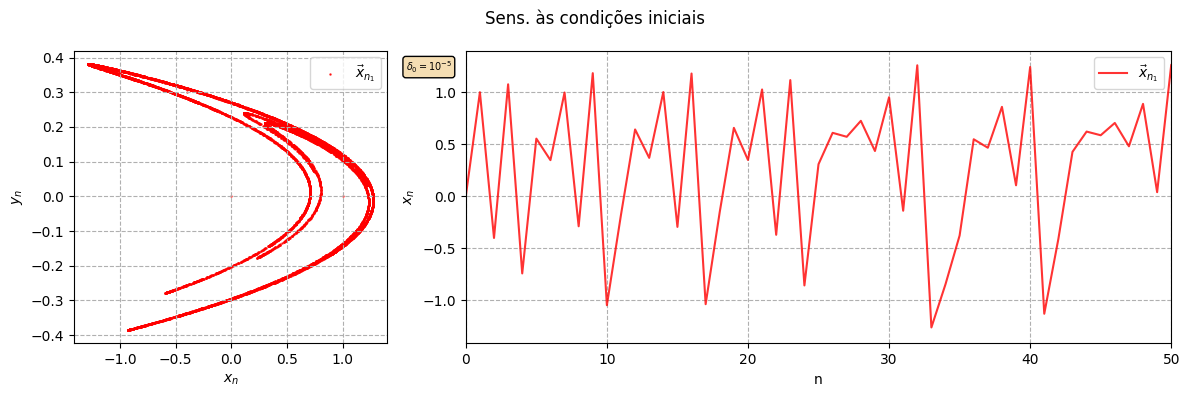

<Figure size 640x480 with 0 Axes>

In [ ]:
#@title Basico
def mapa_heninho(x0,y0,a,b):
  x=y0+1-a* x0**2
  y=b*x0
  return x,y

Nt=10**4
t=np.linspace(0,10,Nt)
x1=np.zeros(t.size)
y1=np.zeros(t.size)
cond_init = [0,0] #Condições Iniciais de x(t) e y(t)


x1[0]=cond_init[0]
y1[0]=cond_init[1]


for n in range(len(t)-1):
  x1[n+1],y1[n+1]=mapa_heninho(x1[n],y1[n],1.40,0.3)#a_max<1.4014, b_max<0.314


plt.clf()
fig=plt.figure(figsize=(12,4))
ax1=plt.subplot(131)
ax1.scatter(x1,y1, color='r', alpha = 0.8, s=0.6,label=r'$\vec{x}_{n_{1}}$')
ax1.grid(ls='--')
ax1.set_xlabel(r'$x_n$')
ax1.legend()
ax1.set_ylabel(r'$y_n$')

listapasso=[]
for i in range(len(x1)):
  listapasso.append(i)
ax2=plt.subplot(1,3,(2,3))
ax2.plot(listapasso,x1, '-', color='r', alpha = 0.8, markersize=0.5,label=r'$\vec{x}_{n_{1}}$')
ax2.set_xlim(0,50)

props = dict(boxstyle='round', facecolor='wheat')
texto=ax2.text(-0.085,0.97,strg, fontsize='x-small',verticalalignment='top', bbox=props,transform=ax2.transAxes)

ax2.grid(ls='--')
ax2.set_xlabel('n')
ax2.set_ylabel('$x_n$')
ax2.legend()
plt.suptitle('Sens. às condições iniciais')
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDNL/Mapão de Heninho/trappingregion.png')